# Importing Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load Dataset

In [71]:
df=pd.read_csv(r'C:\Users\Mahaveer\Downloads\loan_pred_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Missing values Treatment

In [73]:
df[pd.isnull(df.Loan_Amount_Term)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


In [5]:
df['Gender']=df.Gender.fillna(df['Gender'].mode()[0])

In [6]:
df['Married']=df.Married.fillna(df['Married'].mode()[0])

In [7]:
df['Dependents']=df.Dependents.fillna(df['Dependents'].mode()[0])

In [8]:
df['Self_Employed']=df.Self_Employed.fillna(df['Self_Employed'].mode()[0])

In [9]:
df['LoanAmount']=df.LoanAmount.fillna(df['LoanAmount'].mean())

In [10]:
df['Loan_Amount_Term']=df.Loan_Amount_Term.fillna(df['Loan_Amount_Term'].mean())

In [11]:
df['Credit_History']=df.Credit_History.fillna(df['Credit_History'].mode()[0])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

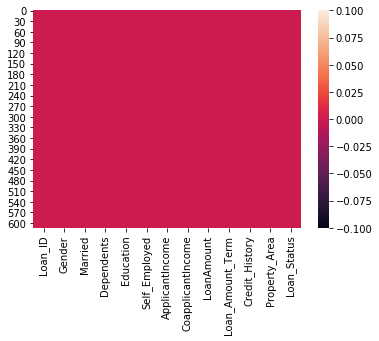

In [14]:
sns.heatmap(df.isnull())

# Exploratory Data Analysis

In [15]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


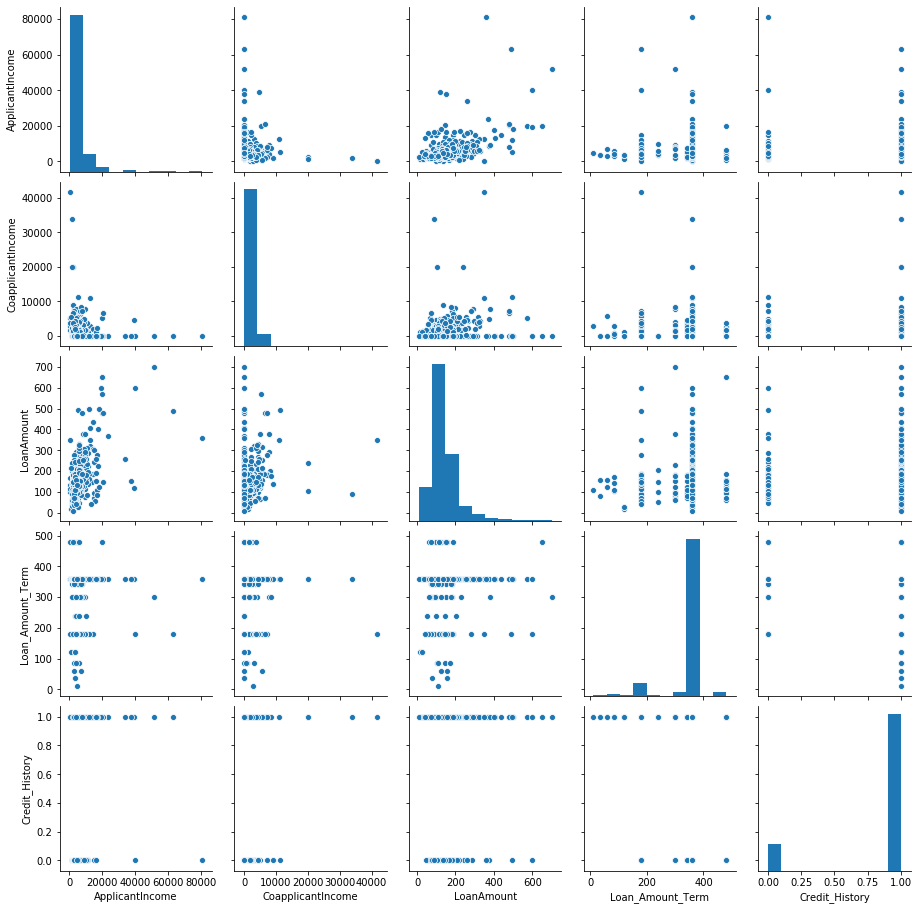

In [16]:
sns.pairplot(df)

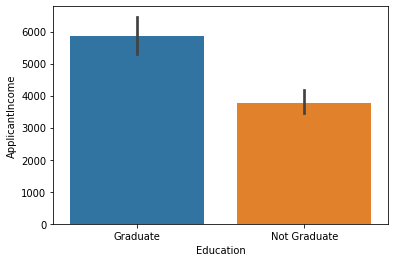

In [17]:
sns.barplot('Education','ApplicantIncome',data=df)

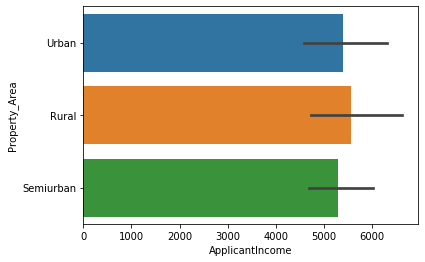

In [18]:
sns.barplot(y='Property_Area',x='ApplicantIncome',data=df)

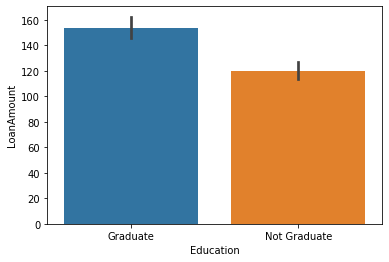

In [19]:
sns.barplot('Education','LoanAmount',data=df)

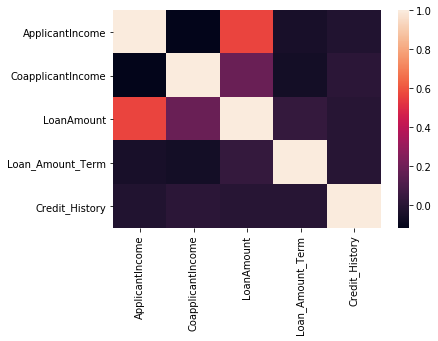

In [20]:
sns.heatmap(df.corr())

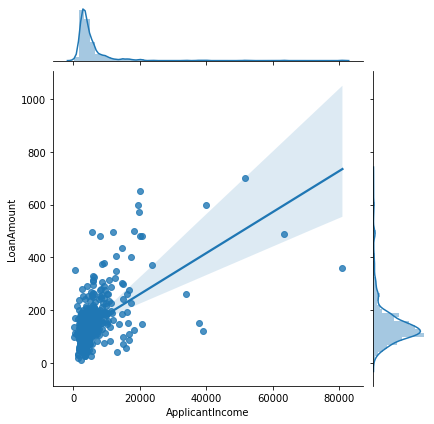

In [21]:
sns.jointplot(y='LoanAmount',x='ApplicantIncome',data=df,kind='reg')

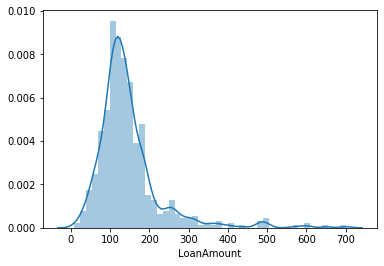

In [22]:
sns.distplot(df['LoanAmount'])

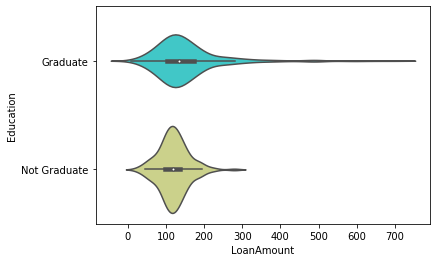

In [23]:
sns.violinplot(x="LoanAmount", y="Education", data=df,palette='rainbow')

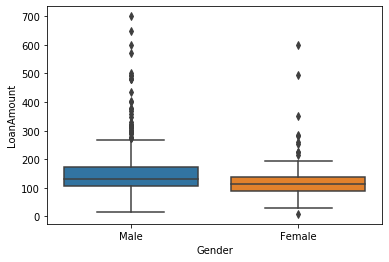

In [24]:
sns.boxplot(x="Gender", y="LoanAmount", data=df)

## Data Prepration for model training

In [25]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y


In [26]:
df.to_csv('loan.csv', index=False)

In [48]:
df['Dependents']=df.Dependents.replace('3+','3')

In [49]:
data = pd.get_dummies(df, columns =['Gender', 'Married', 'Self_Employed'])

In [50]:
data.columns

Index(['Loan_ID', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Self_Employed_No', 'Self_Employed_Yes'],
      dtype='object')

In [51]:
a=data.drop(['Loan_ID','Gender_Male','Married_No','Self_Employed_No'],axis=1)

In [52]:
a['Education']= data.Education.replace({'Graduate': 1,'Not Graduate':0})
a['Property_Area']=data.Property_Area.replace({'Rural': 0,'Semiurban':1,'Urban':2})

In [53]:
a.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Married_Yes,Self_Employed_Yes
0,0,1,5849,0.0,146.412162,360.0,1.0,2,Y,0,0,0
1,1,1,4583,1508.0,128.000000,360.0,1.0,0,N,0,1,0
2,0,1,3000,0.0,66.000000,360.0,1.0,2,Y,0,1,1
3,0,0,2583,2358.0,120.000000,360.0,1.0,2,Y,0,1,0
4,0,1,6000,0.0,141.000000,360.0,1.0,2,Y,0,0,0


In [54]:
X_train=a[['Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Gender_Female','Married_Yes','Self_Employed_Yes']]#.values.reshape(-1,1)

In [55]:
y_train=a[['Loan_Status']]

### Importing Scikit-learn modules

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [57]:
scaler=MinMaxScaler()

## Prepraing Test data for the model

In [58]:
tdf=pd.read_csv(r'C:\Users\Mahaveer\Downloads\test_loan.csv')
tdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [59]:
tdf['Dependents']=tdf.Dependents.replace('3+','3')
tdf['Education']= tdf.Education.replace({'Graduate': 1,'Not Graduate':0})
tdf['Property_Area']=tdf.Property_Area.replace({'Rural': 0,'Semiurban':1,'Urban':2})

In [60]:
tdf['Gender']=tdf.Gender.fillna(tdf['Gender'].mode()[0])
tdf['Married']=tdf.Married.fillna(tdf['Married'].mode()[0])
tdf['Dependents']=tdf.Dependents.fillna(tdf['Dependents'].mode()[0])
tdf['Self_Employed']=tdf.Self_Employed.fillna(tdf['Self_Employed'].mode()[0])
tdf['LoanAmount']=tdf.LoanAmount.fillna(tdf['LoanAmount'].mean())
tdf['Loan_Amount_Term']=tdf.Loan_Amount_Term.fillna(tdf['Loan_Amount_Term'].median())
tdf['Credit_History']=tdf.Credit_History.fillna(tdf['Credit_History'].mode()[0])

In [61]:
tdata = pd.get_dummies(tdf, columns =['Gender', 'Married', 'Self_Employed'])
b=tdata.drop(['Loan_ID','Gender_Male','Married_No','Self_Employed_No'],axis=1)
b.columns

Index(['Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Gender_Female', 'Married_Yes', 'Self_Employed_Yes'],
      dtype='object')

In [62]:
X_test=b[['Dependents','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Gender_Female','Married_Yes','Self_Employed_Yes']]#.values.reshape(-1,1)

# Training Logistic Regression Model

In [63]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [65]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)
clf=LogisticRegression(C=1).fit(X_train_scaled,np.ravel(y_train))

In [66]:
clf_pred=clf.predict(X_test_scaled)
d=tdf['Loan_ID'].values
e={'Loan_ID':d,'Loan_Status':clf_pred}
final= pd.DataFrame(e)

In [67]:
final.groupby('Loan_Status').count()

,Loan_ID
Loan_Status,
N,59
Y,308


#### Accuracy of the model is 0.777777778

## Hyperparameter tuning by GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV
parameters= [{'C':[.001,.01,1,5,10]}]
grid_search=GridSearchCV(estimator=clf,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)
grid_search=grid_search.fit(X_train_scaled,np.ravel(y_train))

In [76]:
grid_search.best_score_

0.809462881514061

In [77]:
grid_search.best_params_

{'C': 1}